# Actividad
Machine Learning en Regresión Logística vs. Deep Learning



---

Por: Ángela Daniela Córdoba Álvarez


---



Link dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df_wine = pd.read_csv('winequality-red.csv')

# Verificar las primeras filas del dataset
df_wine.head()

# Separar las características y las etiquetas
X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

# Normalizar las características
X = StandardScaler().fit_transform(X)

# Convertir las etiquetas a codificación one-hot
y_cat = to_categorical(y - 1)  # Restamos 1 para que las etiquetas sean 0-indexadas

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Regresión Logística

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Cargar datos
import pandas as pd
data = pd.read_csv('winequality-red.csv')

# Preprocesamiento
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Cálculo de métricas
accuracy_f = np.round(accuracy_score(y_test, y_pred), 2)
precision_f = np.round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_f = np.round(recall_score(y_test, y_pred, average='weighted'), 2)
f1_f = np.round(f1_score(y_test, y_pred, average='weighted'), 2)

print(f"Precisión: {precision_f}")
print(f"Recall:    {recall_f}")
print(f"F1:        {f1_f}")
print(f"Accuracy:  {accuracy_f}")

Matriz de Confusión:
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 47 79  6  0]
 [ 0  0  3 33  6  0]
 [ 0  0  0  2  3  0]]
Precisión: 0.53
Recall:    0.57
F1:        0.54
Accuracy:  0.57


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
# R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

R^2: 0.23489591894678652


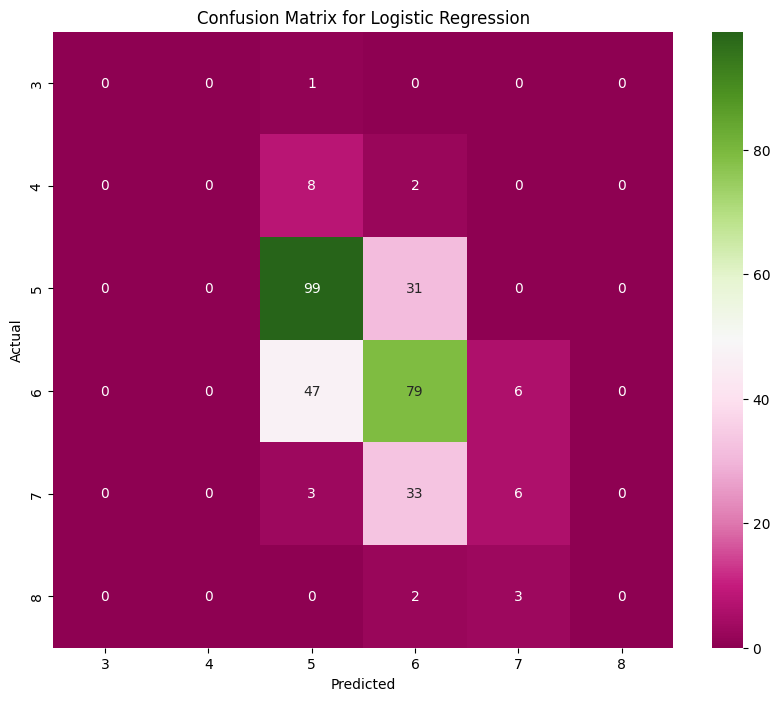

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

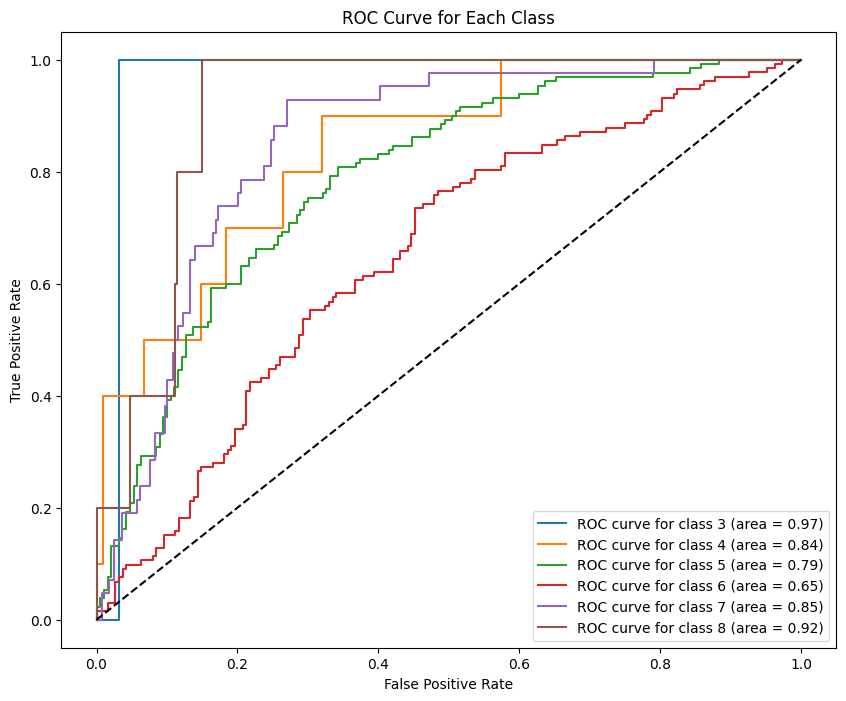

Class 3 FPR: [0.         0.0031348  0.03134796 0.03134796 0.03761755 0.04388715
 0.13793103 0.14420063 0.35109718 0.36050157 0.5015674  0.50783699
 0.54231975 0.54858934 0.64576803 0.65203762 0.68338558 0.69278997
 0.76175549 0.76802508 1.        ]
Class 3 TPR: [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Class 3 Thresholds: [           inf 6.83384781e-02 3.44068647e-02 2.88277869e-02
 2.82965397e-02 2.74999958e-02 1.61360163e-02 1.52020471e-02
 5.73039345e-03 5.29776626e-03 2.47133654e-03 2.43270086e-03
 2.21801729e-03 2.18413590e-03 1.54890153e-03 1.54154355e-03
 1.30548389e-03 1.29004329e-03 7.77341470e-04 7.64079833e-04
 1.47034684e-10]

Class 4 FPR: [0.         0.         0.00967742 0.00967742 0.05806452 0.06451613
 0.06774194 0.06774194 0.1483871  0.1483871  0.18387097 0.18387097
 0.26451613 0.26451613 0.27741935 0.28387097 0.31935484 0.31935484
 0.42580645 0.43225806 0.46774194 0.47741935 0.57419355 0.57419355
 0.58064516 0.64193548 0.6483871  0.65483871 0.66

In [7]:
# Curva ROC
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para cada clase
y_prob = model.predict_proba(X_test)  # Use predict_proba for probabilities

# Calcular la curva ROC para cada clase
plt.figure(figsize=(10, 8))
n_classes = len(model.classes_)  # Get the number of classes

for i in range(n_classes):
    # Obtener las probabilidades para la clase actual
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=model.classes_[i])
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC para la clase actual
    plt.plot(fpr, tpr, label=f'ROC curve for class {model.classes_[i]} (area = {roc_auc:.2f})')

# Graficar la diagonal 50% línea
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

# Mostrar los valores de FPR, TPR y thresholds para cada clase
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, i], pos_label=model.classes_[i])
    print(f'Class {model.classes_[i]} FPR: {fpr}')
    print(f'Class {model.classes_[i]} TPR: {tpr}')
    print(f'Class {model.classes_[i]} Thresholds: {thresholds}\n')

In [8]:
# AUC
# Obtener las probabilidades de predicción para cada clase
y_prob = model.predict_proba(X_test)  # Use predict_proba for probabilities

# Calcular el AUC para clasificación multiclase
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f'AUC: {auc:.2f}')

AUC: 0.84


### Deep Learning

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2919 - loss: 2.9189 - val_accuracy: 0.4062 - val_loss: 1.5225
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4537 - loss: 1.7840 - val_accuracy: 0.5000 - val_loss: 1.2757
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5016 - loss: 1.3745 - val_accuracy: 0.4805 - val_loss: 1.1830
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4678 - loss: 1.3070 - val_accuracy: 0.5312 - val_loss: 1.1025
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4904 - loss: 1.2372 - val_accuracy: 0.5195 - val_loss: 1.0795
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4757 - loss: 1.2537 - val_accuracy: 0.5508 - val_loss: 1.0885
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4949 - loss: 1.1947 - val_accuracy: 0.5391 - val_loss: 1.0737
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5129 - loss: 1.1117 - val_accuracy: 0.5352 - val_los

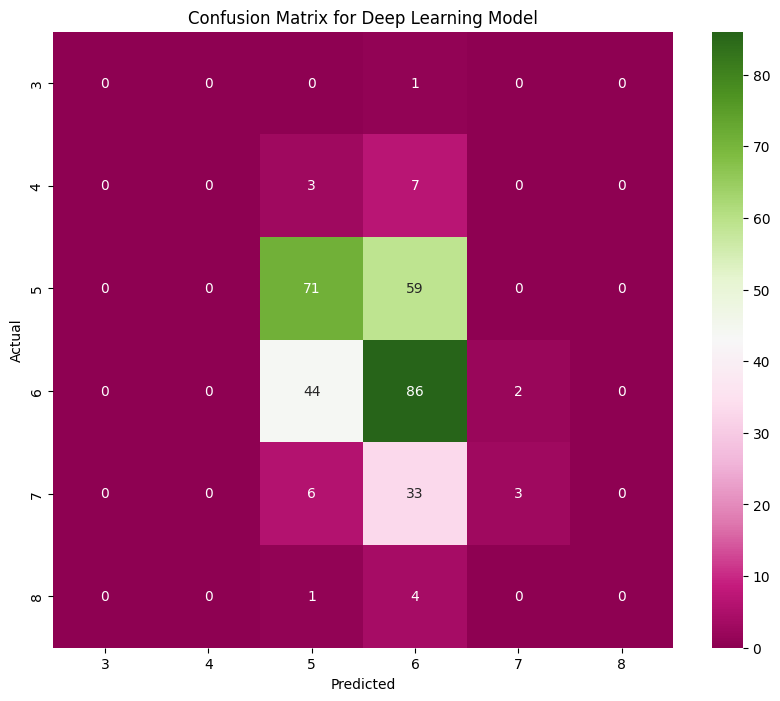

Matriz de Confusión Deep Learning:
[[ 0  0  0  1  0  0]
 [ 0  0  3  7  0  0]
 [ 0  0 71 59  0  0]
 [ 0  0 44 86  2  0]
 [ 0  0  6 33  3  0]
 [ 0  0  1  4  0  0]]
Precisión: 0.5
Recall:    0.5
F1:        0.46
Accuracy:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Preprocesamiento
X = data.drop('quality', axis=1).values
y = to_categorical(data['quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construcción del modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predicción
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm_deep = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm_deep, annot=True, fmt='d', cmap='PiYG', xticklabels=sorted(np.unique(y_test)), yticklabels=sorted(np.unique(y_test)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Deep Learning Model')
plt.show()

print("Matriz de Confusión Deep Learning:")
print(cm_deep)

# Cálculo de métricas
accuracy_f = np.round(accuracy_score(y_test, y_pred), 2)
precision_f = np.round(precision_score(y_test, y_pred, average='weighted'), 2)
recall_f = np.round(recall_score(y_test, y_pred, average='weighted'), 2)
f1_f = np.round(f1_score(y_test, y_pred, average='weighted'), 2)

print(f"Precisión: {precision_f}")
print(f"Recall:    {recall_f}")
print(f"F1:        {f1_f}")
print(f"Accuracy:  {accuracy_f}")

In [10]:
from sklearn.preprocessing import StandardScaler

#Dividir datos en entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid =train_test_split(X_train_full, y_train_full)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

history = model.fit (X_train, y_train,epochs=250,validation_data=(X_valid, y_valid))

Epoch 1/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4601 - loss: 1.5544 - val_accuracy: 0.5500 - val_loss: 1.1869
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5803 - loss: 1.1060 - val_accuracy: 0.5875 - val_loss: 1.0686
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6039 - loss: 0.9869 - val_accuracy: 0.5906 - val_loss: 1.0462
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6034 - loss: 0.9945 - val_accuracy: 0.6094 - val_loss: 1.0272
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5931 - loss: 0.9477 - val_accuracy: 0.6031 - val_loss: 1.0245
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6343 - loss: 0.8788 - val_accuracy: 0.6219 - val_loss: 1.0197
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6374 - loss: 0.8711 - val_accuracy: 0.6219 - val_loss: 1.0165
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6321 - loss: 0.8914 - val_accuracy: 0.6187 - 

<Axes: >

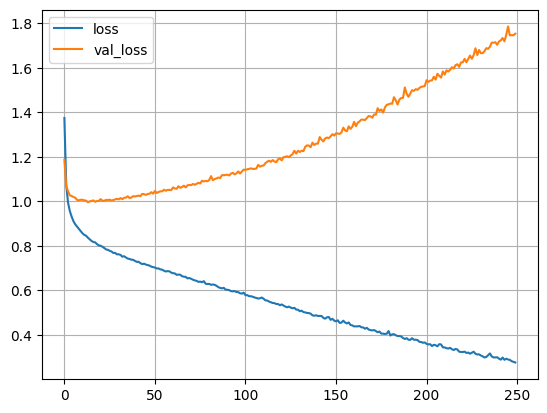

In [11]:
# Graficar el historial de entrenamiento
df = pd.DataFrame(history.history)
df[['loss', 'val_loss']].plot(grid=True)

In [12]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(X_train, y_train) # Only unpack two values
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)
print("accuracy train:", accuracy)

# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(X_valid, y_valid) # Only unpack two values
print("Evaluar el modelo en el conjunto de validacion")
print("loss valid:", loss)
print("accuracy valid:", accuracy)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test) # Only unpack two values
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)
print("accuracy test:", accuracy)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9200 - loss: 0.2628  
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.26137301325798035
accuracy train: 0.9186652898788452
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6019 - loss: 1.8588 
Evaluar el modelo en el conjunto de validacion
loss valid: 1.7535922527313232
accuracy valid: 0.6031249761581421
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6199 - loss: 1.5490 
Evaluar el modelo en el conjunto de prueba
loss test: 1.3610483407974243
accuracy test: 0.640625


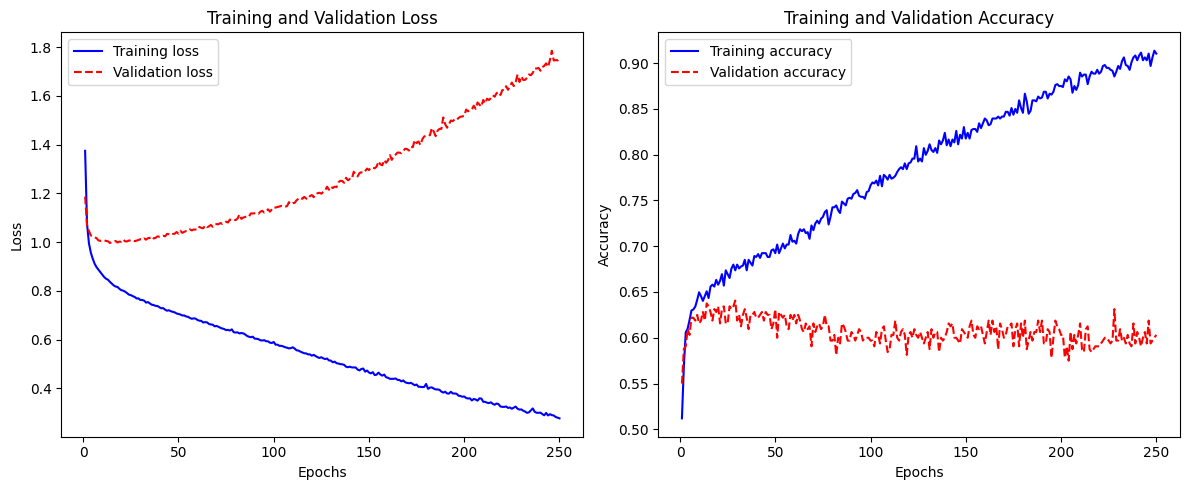

In [13]:
# Obtener registros de historia de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Graficar pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()